## youtube video is below

## name of the youtube video

## How to do Churn Prediction of Customers? | Python Code Part - 2

## https://www.youtube.com/watch?v=6XjdvSvOUmk


# importing the necessary library


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import plotly.offline as po 
import plotly.graph_objs as go 
%matplotlib inline

## importing the data

In [3]:
churn_dataset= pd.read_csv('Tel_Customer_Churn_Dataset.csv')

## comparing the churn and not churn for checking the imbalance dataset

In [4]:
churn_dataset.groupby('Churn')['Churn'].agg('count')

Churn
No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
churn_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
churn_dataset.dtypes.head(5)

customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object

In [7]:


churn_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## the distribution comparation for 'senior citizen' columns

SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

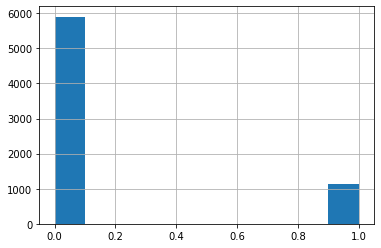

In [11]:
churn_dataset['SeniorCitizen'].hist()
churn_dataset.groupby('SeniorCitizen')['SeniorCitizen'].agg('count')


# distribution of the 'internet service ' column
# to check the existing data

InternetService
DSL            2421
Fiber optic    3096
No             1526
Name: InternetService, dtype: int64

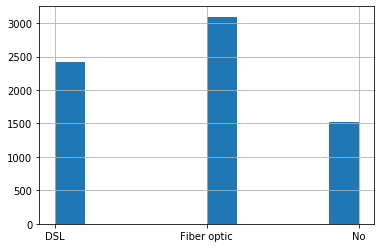

In [10]:
churn_dataset['InternetService'].hist()
churn_dataset.groupby('InternetService')['InternetService'].agg('count')

Contract
Month-to-month    3875
One year          1473
Two year          1695
Name: Contract, dtype: int64

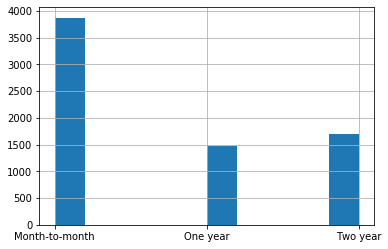

In [9]:
churn_dataset['Contract'].hist()
churn_dataset.groupby('Contract')['Contract'].agg('count')

## checking for any missing value

In [8]:
churn_dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
churn_dataset.shape

(7043, 21)

## convert 'no internet service' to 'No ' for the selected columns

In [159]:
cols= ['StreamingMovies','DeviceProtection','TechSupport',
      'OnlineSecurity','StreamingTV']
for i in cols: 
    churn_dataset[i]=churn_dataset[i].replace({'No internet Service':'No'})

In [51]:
churn_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## changing the 'No Internet Service' to 'No' then later to be encoded'

In [13]:
churn_dataset['OnlineBackup']=churn_dataset['OnlineBackup'].replace({'No internet service':'No'})
churn_dataset['StreamingMovies']=churn_dataset['StreamingMovies'].replace({'No internet service':'No'})
churn_dataset['DeviceProtection']=churn_dataset['DeviceProtection'].replace({'No internet service':'No'})
churn_dataset['TechSupport']=churn_dataset['TechSupport'].replace({'No internet service':'No'})
churn_dataset['OnlineSecurity']=churn_dataset['OnlineSecurity'].replace({'No internet service':'No'})
churn_dataset['StreamingTV']=churn_dataset['StreamingTV'].replace({'No internet service':'No'})

In [14]:
churn_dataset['StreamingTV'].value_counts()

No     4336
Yes    2707
Name: StreamingTV, dtype: int64

In [15]:
churn_dataset['OnlineSecurity'].value_counts()

No     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

In [16]:
churn_dataset['TechSupport'].value_counts()

No     4999
Yes    2044
Name: TechSupport, dtype: int64

In [165]:
churn_dataset['DeviceProtection'].value_counts()

No     4621
Yes    2422
Name: DeviceProtection, dtype: int64

In [164]:
churn_dataset['StreamingMovies'].value_counts()

No     4311
Yes    2732
Name: StreamingMovies, dtype: int64

In [17]:
churn_dataset['OnlineBackup'].value_counts()

No     4614
Yes    2429
Name: OnlineBackup, dtype: int64

## replace the space with the Null 

In [19]:
churn_dataset['TotalCharges'].replace(' ',np.nan,inplace=True)

In [20]:
churn_dataset['TotalCharges'].dropna(inplace=True)

## change the type into float 

In [18]:
churn_dataset['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [21]:
churn_dataset['Churn']=churn_dataset['Churn'].replace({'No':0,'Yes':1})

In [23]:
churn_dataset['Churn']=churn_dataset['Churn'].astype(float)

In [24]:
print(churn_dataset['Churn'].dtypes)
print(churn_dataset['Churn'].value_counts())


float64
0.0    5174
1.0    1869
Name: Churn, dtype: int64


## visualizing the total customer churn

Text(0, 0.5, 'number in *000')

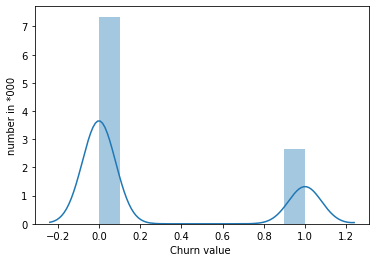

In [25]:
sns.distplot(churn_dataset['Churn'])
plt.xlabel('Churn value ')
plt.ylabel('number in *000')

In [203]:
churn_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## need to do churn rate plot by Gender,phoneservice,techsupport, paymentmethod, 

## gender male with 0 or churn value or male not churn

In [33]:
print('male not churn :',churn_dataset['gender'][churn_dataset['Churn']==0][churn_dataset['gender']=='Male'].agg('count'))
print('male  churn :',churn_dataset['gender'][churn_dataset['Churn']==1][churn_dataset['gender']=='Male'].agg('count'))


male not churn : 2625
male  churn : 930


In [35]:
print('not churn female : ',churn_dataset['gender'][churn_dataset['gender']=='Female'][churn_dataset['Churn']==0].agg('count'))
print('churn female : ',churn_dataset['gender'][churn_dataset['gender']=='Female'][churn_dataset['Churn']==1].agg('count'))

not churn female :  2549
churn female :  939


In [36]:
churn_dataset['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

## performing one hot encoder using get dummies method

In [37]:
churn_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [226]:
churn_dataset['DeviceProtection'].value_counts()

No     4621
Yes    2422
Name: DeviceProtection, dtype: int64

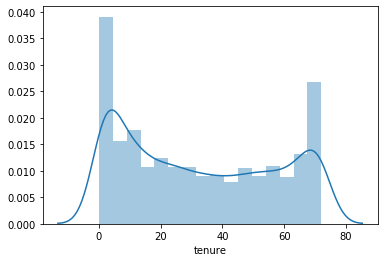

In [38]:
sns.distplot(churn_dataset['tenure'])

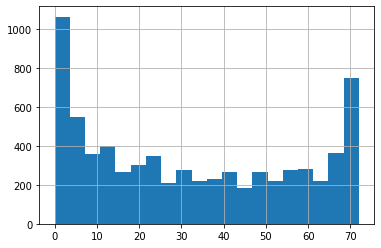

In [39]:
churn_dataset['tenure'].hist(bins=20)

## performing churn dataset ONE HOT ENCODING
### using get_dummies method

In [40]:
churn_dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## alll the categories that already labeled as yes no or any other labeling method

## for this case , all the 'YES NO' label

In [147]:
churn_datasetfix=pd.get_dummies(churn_dataset, columns= ['Contract','Dependents','DeviceProtection','gender',
                                       'InternetService','MultipleLines','OnlineBackup',
                                        'OnlineSecurity','PaperlessBilling','Partner','PaymentMethod',
                                       'PhoneService','SeniorCitizen','StreamingMovies','StreamingTV',
                                       'TechSupport'],
              drop_first=True)

In [148]:
churn_datasetfix.shape

(7043, 26)

In [149]:
churn_datasetfix.dropna(inplace=True)

In [151]:
churn_datasetfix.shape

(7032, 26)

## perform one hot encoding

## importing necessary library for one hot encoding

In [60]:
from sklearn.preprocessing import StandardScaler

In [65]:
#columns_scalling=['tenure','MonthlyCharges','TotalCharges']
#churn_datasetfix(columns_scalling)=StandardScaler.fit_transform(churn_datasetfix[columns_scalling])

In [152]:
standardscaler=StandardScaler()
columns_scalling=['tenure','MonthlyCharges','TotalCharges']


## we standardize the scale of 'tenure,monthly charges, and totalCharges' columns

## standard scaller for the value or numeric that has different scale

In [153]:
churn_datasetfix[columns_scalling]=standardscaler.fit_transform(churn_datasetfix[columns_scalling])

In [154]:
churn_datasetfix

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_Yes,gender_Male,...,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,SeniorCitizen_1,StreamingMovies_Yes,StreamingTV_Yes,TechSupport_Yes
0,7590-VHVEG,-1.280248,-1.161694,-0.994194,0.0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1,5575-GNVDE,0.064303,-0.260878,-0.173740,0.0,1,0,0,1,1,...,0,0,0,0,1,1,0,0,0,0
2,3668-QPYBK,-1.239504,-0.363923,-0.959649,1.0,0,0,0,0,1,...,1,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,0.512486,-0.747850,-0.195248,0.0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,9237-HQITU,-1.239504,0.196178,-0.940457,1.0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,-0.343137,0.664868,-0.129180,0.0,1,0,1,1,1,...,1,1,0,0,1,1,0,1,1,1
7039,2234-XADUH,1.612573,1.276493,2.241056,0.0,1,0,1,1,0,...,1,1,1,0,0,1,0,1,1,0
7040,4801-JZAZL,-0.872808,-1.170004,-0.854514,0.0,0,0,1,0,0,...,1,1,0,1,0,0,0,0,0,0
7041,8361-LTMKD,-1.158016,0.319168,-0.872095,1.0,0,0,0,0,1,...,1,1,0,0,1,1,1,0,0,0


## visualizing the result of the standardScaling  for the necessary columns

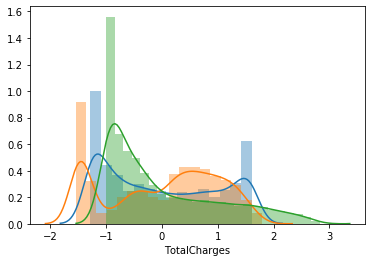

In [155]:
sns.distplot(churn_datasetfix['tenure'])
sns.distplot(churn_datasetfix['MonthlyCharges'])
sns.distplot(churn_datasetfix['TotalCharges'])


## splitting into X and Y (features and target )

In [127]:
churn_datasetfix.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_One year', 'Contract_Two year', 'Dependents_Yes',
       'DeviceProtection_Yes', 'gender_Male', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'OnlineBackup_Yes', 'OnlineSecurity_Yes',
       'PaperlessBilling_Yes', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PhoneService_Yes', 'SeniorCitizen_1', 'StreamingMovies_Yes',
       'StreamingTV_Yes', 'TechSupport_Yes'],
      dtype='object')

In [156]:
x=churn_datasetfix.drop(columns=['Churn','customerID'])
y=churn_datasetfix['Churn']

## splitting for training and testing for the dataset

## training size is 70% for training 30% is for testing

In [157]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=50)

## machine learning libraries importing

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

## checking is there any null value

In [160]:
churn_datasetfix.isnull().sum()

customerID                               0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
Contract_One year                        0
Contract_Two year                        0
Dependents_Yes                           0
DeviceProtection_Yes                     0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
OnlineBackup_Yes                         0
OnlineSecurity_Yes                       0
PaperlessBilling_Yes                     0
Partner_Yes                              0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
PhoneService_Yes                         0
SeniorCitizen_1                          0
StreamingMo

## drop null

In [159]:
print('y shape:',y_train.shape)
print('x shape:',X_train.shape)

y shape: (4922,)
x shape: (4922, 24)


# 1. fit the logistic regression model

## fitting


In [161]:
logmodel=LogisticRegression(random_state=50)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=50)

## predicting

In [246]:
# predicting the value
log_predicted= logmodel.predict(X_test)
logmodel_accuracy=(metrics.accuracy_score(y_test,log_predicted)*100)

## accurac score

In [247]:
# accuracy
print('accuracy for the logistic regression is: ',logmodel_accuracy)

accuracy for the logistic regression is:  81.13744075829385


# 2. SVM classification model

## fitting


In [196]:
## fir the Support Vector Machine model 
SVCmodel=SVC(kernel='linear', random_state=50,probability=True)
SVCmodel.fit(X_train,y_train)

SVC(kernel='linear', probability=True, random_state=50)

## predicting

In [198]:
# predict tthe value
SVCpredicted= SVCmodel.predict(X_test)

## scoring and accuracy 

In [200]:
# check the scorring or accuracy 
SVCmodel_accuracy=metrics.accuracy_score(y_test,SVCpredicted)*100

In [202]:
print('result using SVC model accuracy: ',SVCmodel_accuracy)

result using SVC model accuracy:  80.66350710900474


# 3. Knearest neighboor method

# 4. Decision Tree

## fitting model

In [214]:
from sklearn.tree import DecisionTreeClassifier

In [215]:
dtmodel= DecisionTreeClassifier(criterion='gini',random_state=50)
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(random_state=50)

## predicting value

In [216]:
dt_predicted= dtmodel.predict(X_test)

In [222]:
dt_predicted

array([1., 0., 1., ..., 0., 0., 0.])

## checking accuracy 

In [220]:
dt_accuracy=metrics.accuracy_score(y_test,dt_predicted)*100

In [221]:
dt_accuracy

73.2701421800948

In [253]:
print(y_test.shape)
print(dt_predicted.shape)

(2110,)
(2110,)


In [254]:
dtcompare=pd.DataFrame({
    'test data': y_test,
    'prediction': dt_predicted
})

In [267]:
dtcompare[dtcompare['test data']== dtcompare['prediction']].head(2)

,test data,prediction
733,0.0,0.0
5864,0.0,0.0


In [262]:
 dtresult = pd.concat([dtcompare,X_test], axis=1, join='inner')


#  5. RANDOM FOREST METHOD

In [101]:
from sklearn.ensemble import RandomForestClassifier

## fitting the data

In [206]:
rfmodel=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
rfmodel.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

## predict the value of the testing data

In [209]:
rf_predict=rfmodel.predict(X_test)

In [210]:
rf_predict

array([0., 0., 1., ..., 0., 0., 0.])

## accuracy or the score


In [233]:
RF_accuracy=metrics.accuracy_score(y_test,rf_predict)*100

In [234]:
RF_accuracy

79.38388625592417

# MODEL COMPARISSON 

In [225]:
print('Random forest accuracy : ', RF_accuracy)
print('decisoin tree score : ' ,dt_accuracy)
print('Support vector machine : ',SVCmodel_accuracy)
print('logistic regression: ',logmodel_accuracy)

Random forest accuracy :  (79.38388625592417, 2)
decisoin tree score :  73.2701421800948
Support vector machine :  80.66350710900474
logistic regression:  81.13744075829385


## creating the model as dataFrame

In [235]:
model_comparison= pd.DataFrame({
    'Model': ['Logistic regression','decision tree','support vector machine','random forest'],
    'score':[logmodel_accuracy,dt_accuracy,SVCmodel_accuracy,RF_accuracy]
})

In [243]:
model_comparison.sort_values('score',ascending=False).reset_index()

,index,Model,score
0,0,Logistic regression,81.137441
1,2,support vector machine,80.663507
2,3,random forest,79.383886
3,1,decision tree,73.270142


# GENERATE CONFUSION MATRIX

In [245]:
# importing the necessary libray for the confusion matrix
from sklearn.metrics import confusion_matrix

# 1. confussion matrix of logistic regression

In [249]:
conf_max_logmodel=confusion_matrix(y_test,log_predicted)
conf_max_logmodel

array([[1396,  165],
       [ 233,  316]], dtype=int64)

In [265]:
y_test.value_counts()

0.0    1561
1.0     549
Name: Churn, dtype: int64

## since it has the best value, it will be used for predicting customer churn probability

In [278]:
churn_datasetfix['probabilty of churn']=logmodel.predict_proba(churn_datasetfix[X_test.columns])[:,1]


In [279]:
churn_datasetfix.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_One year', 'Contract_Two year', 'Dependents_Yes',
       'DeviceProtection_Yes', 'gender_Male', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'OnlineBackup_Yes', 'OnlineSecurity_Yes',
       'PaperlessBilling_Yes', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PhoneService_Yes', 'SeniorCitizen_1', 'StreamingMovies_Yes',
       'StreamingTV_Yes', 'TechSupport_Yes', 'probabilty of churn'],
      dtype='object')

In [284]:
churn_datasetfix[['customerID','probabilty of churn']][churn_datasetfix['probabilty of churn']>0.6].sort_values('probabilty of churn',ascending=False)

,customerID,probabilty of churn
1976,9497-QCMMS,0.844909
4800,9300-AGZNL,0.844857
3380,5178-LMXOP,0.843403
3749,4424-TKOPW,0.841417
6368,2720-WGKHP,0.840701
...,...,...
4546,5520-FVEWJ,0.602053
2038,9172-JITSM,0.601955
290,7534-BFESC,0.601665
5235,4299-SIMNS,0.601572
